In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


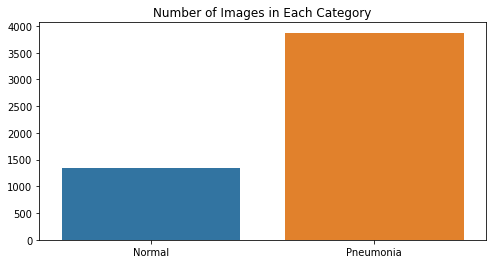

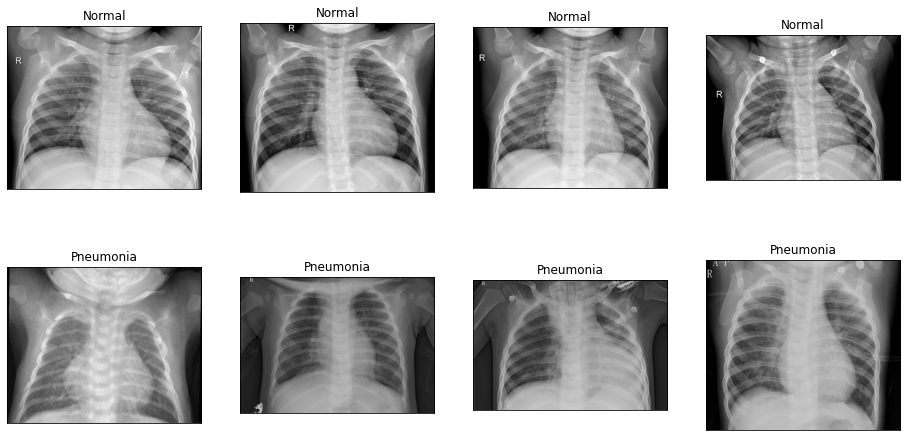

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import requests
from io import BytesIO
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Step 1: Analyze the data

data_dir = '/content/drive/MyDrive/train'

# Plot the number of images in each category
normal_count = len(os.listdir(os.path.join(data_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(data_dir, 'PNEUMONIA')))
plt.figure(figsize=(8, 4))
sns.barplot(x=['Normal', 'Pneumonia'], y=[normal_count, pneumonia_count])
plt.title('Number of Images in Each Category')
plt.show()

# Display some sample images
normal_files = os.listdir(os.path.join(data_dir, 'NORMAL'))
pneumonia_files = os.listdir(os.path.join(data_dir, 'PNEUMONIA'))
sample_normal_files = np.random.choice(normal_files, 4, replace=False)
sample_pneumonia_files = np.random.choice(pneumonia_files, 4, replace=False)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i, filename in enumerate(sample_normal_files):
    img = plt.imread(os.path.join(data_dir, 'NORMAL', filename))
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[0, i].set_title('Normal')
for i, filename in enumerate(sample_pneumonia_files):
    img = plt.imread(os.path.join(data_dir, 'PNEUMONIA', filename))
    axs[1, i].imshow(img, cmap='gray')
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[1, i].set_title('Pneumonia')
plt.show()

In [3]:
# Set the paths for the data
train_data_dir = '/content/drive/MyDrive/train'

# Define image size and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Epoch 1/10
130/130 [==============================] - 77s 561ms/step - loss: 0.3281 - accuracy: 0.8677 - val_loss: 0.3009 - val_accuracy: 0.8838
Epoch 2/10
130/130 [==============================] - 72s 551ms/step - loss: 0.1083 - accuracy: 0.9626 - val_loss: 0.1079 - val_accuracy: 0.9668
Epoch 3/10
130/130 [==============================] - 76s 587ms/step - loss: 0.0903 - accuracy: 0.9667 - val_loss: 0.1204 - val_accuracy: 0.9531
Epoch 4/10
130/130 [==============================] - 73s 560ms/step - loss: 0.0925 - accuracy: 0.9667 - val_loss: 0.1308 - val_accuracy: 0.9531
Epoch 5/10
130/130 [==============================] - 79s 613ms/step - loss: 0.0629 - accuracy: 0.9761 - val_loss: 0.1095 - val_accuracy: 0.9658
Epoch 6/10
130/130 [==============================] - 73s 557ms/step - loss: 0.0528 - accuracy: 0.9807 - val_loss: 0.1046 - val_accuracy: 0.9639
Epoch 7/10
130/130 [==========================

In [ ]:
dir_path = "/content/drive/MyDrive/test"

def detect_all(dir):
    results = []
    for i in os.listdir(dir_path):
        img = image.load_img(dir_path + '//' + i, target_size=(224, 224))
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        test = model.predict(images, verbose=0)
        if test == 0:
            results.append(0)
        else:
            results.append(1)
    return results

In [26]:
# Create DataFrame and save as CSV
solution = pd.read_csv('/content/drive/MyDrive/sample_solution.csv')
solution['labels'] = detect_all(dir_path)
solution.to_csv('solution.csv', index=False)
solution.head(10)

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,1
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,1
5,test_img_10006.jpeg,0
6,test_img_10007.jpeg,1
7,test_img_10008.jpeg,1
8,test_img_10009.jpeg,1
9,test_img_10010.jpeg,1
